# Lab Rotation - Nuno Martinho (7)

### Morgan Fingerprints -  PCA & t-SNE (Drug Bank)

##### rdkit github greglandrum

In [117]:
# Inputs

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import AllChem
from rdkit.Chem import PandasTools
from rdkit.Chem.Draw import IPythonConsole
from __future__ import print_function
%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from tqdm import tqdm

In [118]:
# Upload information of our dataset

Dataset_Fingerprints = np.load('Morgan_Fingerprints.npy')
Dataset = pd.read_csv("Database_curated_WithMorgan.csv")

# Add Morgan Fingerprints to my Dataset dataframe

Dataset["Morgan Fingerprints"] = Dataset_Fingerprints.tolist()

# Make two different dataframes for actives and inactives; make one for DrugBank

Actives = Dataset[Dataset["Active/Inactive"] == 1]
Inactives = Dataset[Dataset["Active/Inactive"] == 0]

# Upload information of DrugBank

DrugBank_Fingerprints = np.load("Morgan_Fingerprints_DrugBank.npy")
DrugBank = pd.read_csv("DrugBank_curated_WithMorgan.csv")

# Add Morgan Fingerprints to my DrugBank dataframe

DrugBank["Morgan Fingerprints"] = DrugBank_Fingerprints.tolist()
DrugBank["Name"] = "DrugBank"

Input = pd.DataFrame(columns = ["Active/Inactive/DrugBank", "Morgan Fingerprints"])
Input["Active/Inactive/DrugBank"] = pd.concat([Actives["Active/Inactive"], Inactives["Active/Inactive"], DrugBank["Name"]]) 
Input["Morgan Fingerprints"] = pd.concat([Actives["Morgan Fingerprints"], Inactives["Morgan Fingerprints"], DrugBank["Morgan Fingerprints"]]) 

In [119]:
Input

,Active/Inactive/DrugBank,Morgan Fingerprints
0,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
6,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
7,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
8,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
9,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."
...,...,...
11618,DrugBank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11619,DrugBank,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ..."
11620,DrugBank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11621,DrugBank,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [120]:
# Add list of all Morgans to be read from PCA

Morgans_list = list(Input["Morgan Fingerprints"])

In [121]:
# Compute PCA

pca = PCA(n_components=2, random_state=0)
pca_arr = pca.fit_transform(Morgans_list)
pca_df = pd.DataFrame(pca_arr, columns=["PC_1", "PC_2"])
pca_df.shape

(11658, 2)

In [122]:
# Add to each dot its information regarding activity

# Reset the index of the DataFrame
Input.reset_index(drop=True, inplace=True)

# Add to each dot its information regarding activity
pca_df["Activity"] = Input["Active/Inactive/DrugBank"]

In [1]:
fig, ax = plt.subplots()
active_points = pca_df[pca_df["Activity"] == 1]
inactive_points = pca_df[pca_df["Activity"] == 0]
drugbank_points = pca_df[pca_df["Activity"] == "DrugBank"]
ax.scatter(drugbank_points["PC_1"], drugbank_points["PC_2"], c='#E5DE01', label='DrugBank')
ax.scatter(active_points["PC_1"], active_points["PC_2"], c='#00B98D', label='Active', edgecolors="black")
ax.scatter(inactive_points["PC_1"], inactive_points["PC_2"], c='#DC2E00', label='Inactive', edgecolors="black")


ax.set_ylabel('PC_2', fontsize=14)
ax.set_xlabel('PC_1', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(label="PCA - Actives/Inactives vs. DrugBank", fontsize=18, pad=10)
ax.legend(fontsize=10, borderaxespad=0.2, handletextpad=0.2, loc="best")
border_linewidth = 2  # Adjust the linewidth as needed
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(border_linewidth)
ax.spines['right'].set_linewidth(border_linewidth)
ax.spines['bottom'].set_linewidth(border_linewidth)
ax.spines['left'].set_linewidth(border_linewidth)

plt.tight_layout()
plt.savefig("PCA_DrugBank.svg", dpi=600)
plt.show()

NameError: name 'plt' is not defined

In [124]:
Input

,Active/Inactive/DrugBank,Morgan Fingerprints
0,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
1,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
2,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
3,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, ..."
4,1.0,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, ..."
...,...,...
11653,DrugBank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11654,DrugBank,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, ..."
11655,DrugBank,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
11656,DrugBank,"[0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [125]:
# Combined arrays - actives, inactives and DrugBank

# Convert the "Morgan Fingerprints" column into a NumPy array of lists

All_Fingerprints = np.array(Input["Morgan Fingerprints"].tolist())

result_array = np.vstack(All_Fingerprints)

In [126]:
# Compute t-SNE/t-Distributed Stochastic Neighborhood Embedding

tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=5000)
tsne_arr = tqdm(tsne.fit_transform(result_array), desc="Computing t-SNE", unit="samples") 
tsne_df = pd.DataFrame(tsne_arr, columns=["TSNE-1", "TSNE-2"])

Computing t-SNE: 100%|██████████| 11658/11658 [00:00<00:00, 1296423.26samples/s]


In [127]:
# Add to each dot its information regarding activity

tsne_df["Activity"] = Input["Active/Inactive/DrugBank"]

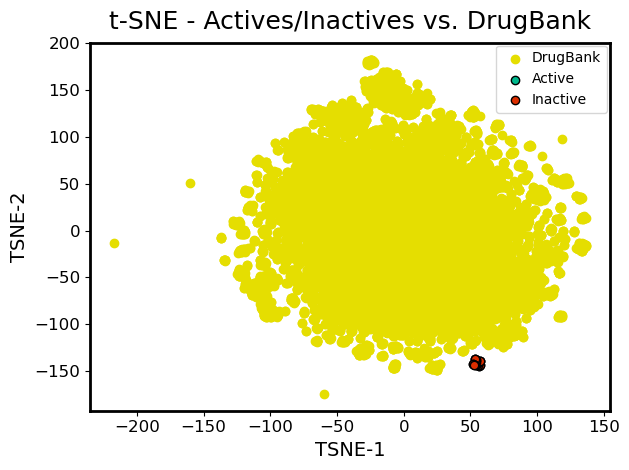

In [128]:
fig, ax = plt.subplots()
active_points = tsne_df[tsne_df["Activity"] == 1]
inactive_points = tsne_df[tsne_df["Activity"] == 0]
drugbank_points = tsne_df[tsne_df["Activity"] == "DrugBank"]
ax.scatter(drugbank_points["TSNE-1"], drugbank_points["TSNE-2"], c='#E5DE01', label='DrugBank')
ax.scatter(active_points["TSNE-1"], active_points["TSNE-2"], c='#00B98D', label='Active', edgecolors="black")
ax.scatter(inactive_points["TSNE-1"], inactive_points["TSNE-2"], c='#DC2E00', label='Inactive', edgecolors="black")

ax.set_ylabel('TSNE-2', fontsize=14)
ax.set_xlabel('TSNE-1', fontsize=14)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title(label="t-SNE - Actives/Inactives vs. DrugBank", fontsize=18, pad=10)
ax.legend(fontsize=10, borderaxespad=0.2, handletextpad=0.2, loc="best")
border_linewidth = 2  # Adjust the linewidth as needed
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
ax.spines['top'].set_linewidth(border_linewidth)
ax.spines['right'].set_linewidth(border_linewidth)
ax.spines['bottom'].set_linewidth(border_linewidth)
ax.spines['left'].set_linewidth(border_linewidth)

plt.tight_layout()
plt.savefig("TSNE_DrugBank.svg", dpi=600)
plt.show()